In [1]:
# http://www.open3d.org/docs/release/getting_started.html
#!pip install open3d

#libraries used
import numpy as np
import open3d as o3d #conda install -c open3d-admin open3d
import pickle
from matplotlib.colors import Colormap, rgb2hex, Normalize
import matplotlib.cm as cm
import matplotlib.pylab as plt

import sys
import importlib
spec_1 = importlib.util.spec_from_file_location("DataFusionTools", "../../DataFusionTools/__init__.py")
module_1 = importlib.util.module_from_spec(spec_1)
sys.modules[spec_1.name] = module_1 
spec_1.loader.exec_module(module_1)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
with open('data/new_data.pickle','rb') as f: 
    [idx, x, y, z, dx, dy, dz, values] = pickle.load(f)

In [3]:
xyz = np.vstack((x, y, z)).transpose()
dxdydz = np.vstack((dx, dy, dz)).transpose()

<img src="../static/data_overview.png" width="800" height="1080">

# Quick start

Here is an overview of the original dataset in matplotlib

## Original plot

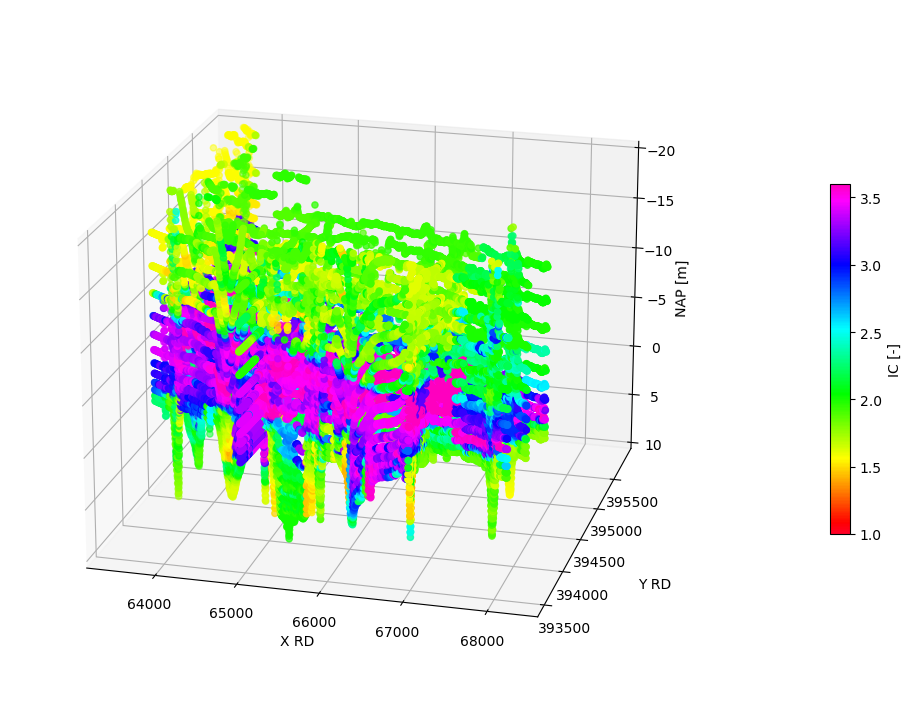

In [4]:
import matplotlib.pylab as plt

# Creating figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')    
ax.set_position([-0.12, 0.0, 1, 1])
ax.view_init(20, -75)

cmap = plt.get_cmap('gist_rainbow', 11) 

# plot data
im = ax.scatter(x, y, z, c=values['label_values'][1],
                vmin=1, vmax=3.6, cmap='gist_rainbow')

# axis labels
ax.set_xlabel("X RD", fontsize=10)
ax.set_ylabel("Y RD", labelpad=20, fontsize=10)
ax.set_zlabel("NAP [m]", fontsize=10)
ax.set_zlim(10, -20)

# legend
cax = plt.axes([0.85, 0.25, 0.02, 0.5])
cbar = plt.colorbar(im, cax=cax, fraction=0.1, pad=0.01)
cbar.set_label("IC [-]", fontsize=10)

## Initiate CesiumViewer

In [5]:
from DataFusionTools.visualisation.cesium import CesiumViewer

In [6]:
viewer = CesiumViewer(result_folder='./data/', port=9090)

## Generate point cloud data from result

### Object in-memory (attached to CesiumViewer)

In [7]:
#viewer.generate_pnts_tiles(xyz,values,name='test_pnts')

In [8]:
#viewer.pnts_tiles.__dict__

In [9]:
#viewer.pnts_tiles.las

### Write pnts tiles on disk

In [10]:
#viewer.pnts_tiles.write_tiles()

## Generate voxel 3D data from result

### Object in-memory (attached to CesiumViewer)

In [11]:
viewer.generate_voxel_tiles(xyz,dxdydz*2,values,1,'test_voxel_1m')

In [12]:
viewer.voxel_tiles.__dict__

{'xyz': array([[ 6.35002333e+04,  3.95018832e+05,  1.47253631e+00],
        [ 6.35002333e+04,  3.95018832e+05,  9.72536315e-01],
        [ 6.35002333e+04,  3.95018832e+05,  3.72536315e-01],
        ...,
        [ 6.82479507e+04,  3.94244014e+05, -1.11055678e+01],
        [ 6.82479507e+04,  3.94244014e+05, -1.37055678e+01],
        [ 6.82479507e+04,  3.94244014e+05, -1.69055678e+01]]),
 'dxdydz': array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 'values': {'label_names': ['Resistivity', 'IC'],
  'label_values': [[24.88,
    25.23,
    25.06,
    23.49,
    19.69,
    14.13,
    8.184,
    3.951,
    1.996,
    1.404,
    1.322,
    1.438,
    1.528,
    7.418,
    6.695,
    5.066,
    3.222,
    1.909,
    1.414,
    1.495,
    1.575,
    1.5,
    1.399,
    1.391,
    1.487,
    1.628,
    0.9232,
    0.932,
    0.9628,
    0.9971,
    1.037,
    1.1,
    1.184,
    1.274,
    1.35,
    1.

In [13]:
viewer.voxel_tiles.voxel_models_cesium

array([[TriangleMesh with 8 points and 12 triangles.,
        array([24.88      ,  2.16031941])],
       [TriangleMesh with 8 points and 12 triangles.,
        array([25.23      ,  2.16031941])],
       [TriangleMesh with 8 points and 12 triangles.,
        array([25.06     ,  2.1611611])],
       ...,
       [TriangleMesh with 8 points and 12 triangles.,
        array([1.454     , 1.99518229])],
       [TriangleMesh with 8 points and 12 triangles.,
        array([1.583     , 2.02969609])],
       [TriangleMesh with 8 points and 12 triangles.,
        array([1.691     , 1.99535515])]], dtype=object)

### Write b3dm tile on disk

In [14]:
viewer.voxel_tiles.write_tiles()

100%|██████████| 62051/62051 [00:07<00:00, 7788.14it/s]
62051it [00:01, 54918.56it/s]


## Start Server attached to Cesium viewer for visualisation

In [15]:
viewer.cesium_server.tiles_served 

['test_voxel', 'test_voxel_1m']

In [16]:
viewer.cesium_server.start_server()
print(viewer.cesium_server.url)

http://localhost:9090


In [17]:
viewer.cesium_server.tiles_url

[{'name': 'test_voxel',
  'resource': 'http://localhost:9090/tiles/test_voxel/tileset.json',
  'colorbar': 'http://localhost:9090/tiles/test_voxel/colorbar.json'},
 {'name': 'test_voxel_1m',
  'resource': 'http://localhost:9090/tiles/test_voxel_1m/tileset.json',
  'colorbar': 'http://localhost:9090/tiles/test_voxel_1m/colorbar.json'}]

In [18]:
viewer.cesium_server.stop_server()

# Tests

In [19]:
#from matplotlib.colors import Colormap, rgb2hex
import pandas as pd

In [20]:
# def _make_colors_dict(cmap):
#     """
#     Create color dictionary {value:, color:} from matplotlib cmap and min max value.

#     Parameters
#     ----------
#     vmin, vmax : float, default: None
#         *vmin* and *vmax* are used in conjunction with the default norm to
#         map the color array *c* to the colormap *cmap*. If None, the
#         respective min and max of the color array is used.
#     cmap : str or `~matplotlib.colors.Colormap`, default: 'gist_rainbow'
#         A `.Colormap` instance or registered colormap name. *cmap* is only
#         used if *c* is an array of floats.

#     return [{value:, color:}]: List[dict]
#     """
#     cmap_tmp = cm.get_cmap(cmap, 10)
#     colors = np.apply_along_axis(rgb2hex,1,cmap_tmp(np.arange(cmap_tmp.N))), 
#     values_quantiles = np.quantile(values['label_values'],np.arange(11)/10,axis=1)[1:]
#     data = np.column_stack([colors[0],values_quantiles])
#     labels = values['label_names']

#     return pd.DataFrame(data,columns=['colors',*labels]).to_dict(orient='records')

In [21]:
_make_colors_dict('gist_rainbow')

NameError: name '_make_colors_dict' is not defined

In [ ]:
# colors = np.apply_along_axis(rgb2hex,1,cmap_tmp(np.arange(cmap.N))), 
# values_quantiles = np.quantile(values['label_values'],np.arange(cmap.N)/10,axis=1)
# data = np.column_stack([colors[0],values_quantiles])
# labels = values['label_names']

In [ ]:
# np.arange(11)/10

In [ ]:
# np.quantile(values['label_values'],np.arange(10)/10,axis=1)

In [ ]:
# import pandas as pd

# pd.DataFrame(data,columns=['colors',*labels]).to_dict(orient='records')[1:]